In [24]:
# Name: Davut Yasir CANO
# ID: 150210328

# Hw I - Fully Connected Neural Networks (100 Points)

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use diamonds dataset for classification; (ii) for actual training and testing of your implementation in this assignment.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under DL/layers.py, which includes functions such as layer.NNLayer.* ...**



In [3]:
import numpy as np
from DL import bases, layers, activations, losses, classifiers, optimizers
from DL.checker.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

**You should read:** https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

### To auto-reload your modules from the *.py files, re run the following cell

In [4]:
%reload_ext autoreload
%autoreload 2

## 1 Layers, Activations and Optimizers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer 

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under `DL/layers.py` and find `AffineLAyer` class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [5]:
# Tanımlama ve Girdi Hazırlığı
num_data_points = 10
input_dimensions = (4, 7, 2)
output_size = 3

# Girdi boyutu ve ağırlık boyutu hesaplamaları
input_total_size = num_data_points * np.prod(input_dimensions)
weight_total_size = output_size * np.prod(input_dimensions)
linearLayer = layers.AffineLayer(input_total_size, weight_total_size)

# Girdi ve ağırlık matrisleri için değerler
data_points = np.linspace(-0.1, 0.5, num=input_total_size).reshape(num_data_points, *input_dimensions)
linearLayer.W = np.linspace(-0.2, 0.3, num=weight_total_size).reshape(np.prod(input_dimensions), output_size)
linearLayer.b = np.linspace(-0.3, 0.1, num=output_size)

# İleri doğru hesaplama ve hata analizi
output_result = linearLayer.forward(data_points)
relativeError = rel_error(output_result, "affine_forward")

# Sonuçları yazdırma
print('Affine layer için ileri yönlü yöntemin testi:')
print(f'Fark: {relativeError}')
assert 1e-6 > relativeError


Testing forward method of affine layer:
difference: 8.825372662436368e-08


#### Backward pass : 
Go under `DL/layers.py` and find `AffineLayer` class. Implement the backward pass for Affine layer.

In [6]:
np.random.seed(250)
input_count = 7
shape_of_input = (4, 10, 3)
dim_output = 8

# Girdi boyutları hesaplamaları
total_input_size = input_count * np.prod(shape_of_input)
total_weight_size = dim_output * np.prod(shape_of_input)
linear_layer = layers.AffineLayer(total_input_size, total_weight_size)

# Girdi ve ağırlık matrisleri için rastgele değerler
input_data = np.random.randn(13, 2, 3)
linear_layer.W = np.random.randn(6, 5)
linear_layer.b = np.random.randn(5)
delta_out = np.random.randn(13, 5)

# Gradyan kontrolü
dx_numerical = grad_check(linear_layer.forward, input_data, delta_out)
dw_numerical = grad_check(lambda _: linear_layer.forward(input_data), linear_layer.W, delta_out)
db_numerical = grad_check(lambda _: linear_layer.forward(input_data), linear_layer.b, delta_out)

# İleri ve geri yönlü hesaplama
linear_layer.forward(input_data)
dx_result, dw_result, db_result = linear_layer.backward(delta_out)

# Hata kontrolü - 1e-6 civarında olmalı
print('Affine layer için geri yönlü yöntemin testi:')
print(f'dx hata: {rel_error(dx_numerical, dx_result)}')
print(f'dw hata: {rel_error(dw_numerical, dw_result)}')
print(f'db hata: {rel_error(db_numerical, db_result)}')

assert 1e-6 > rel_error(dx_numerical, dx_result)
assert 1e-6 > rel_error(dw_numerical, dw_result)
assert 1e-6 > rel_error(db_numerical, db_result)


Testing backward method of affine layer:
dx error: 1.2583719079635203e-09
dw error: 1.5263035322254397e-09
db error: 5.183871742878614e-10


### b. Activation Layers 

Go under `DL/activations.py` and find `ExponentialLinearUnit` class. Implement the forward pass for ExponentialLinearUnit:

ELU(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}


#### Forward pass

In [7]:
expLU = activations.ExponentialLinearUnit(1.0)
input_data = 2 * (np.array([0, 1, 3, 4, -1, 2, 4, 1773, -1773, 1.3, 0.4, -0.1]).reshape(3, -1))
output_data = expLU.forward(input_data)

# NumPy çıktı ayarları
np.set_printoptions(suppress=True, precision=3)
print(np.array(output_data))

# Çıktıyı karşılaştırma
relative_error = rel_error(output_data, "ExponentialLinearUnit_forward")
print('ExponentialLinearUnit katmanı için ileri yönlü yöntemin testi:')
print(f'Hata: {relative_error}')
assert 1e-6 > relative_error


[[   0.       2.       6.       8.   ]
 [  -0.865    4.       8.    3546.   ]
 [  -1.       2.6      0.8     -0.181]]
Testing forward method of ExponentialLinearUnit layer:
Error: 2.15099408081792e-10


c:\Users\sde25\Desktop\ITU\YZV_303E\project\DL\activations.py:17: RuntimeWarning: overflow encountered in exp
  activated_x = np.where(x >= 0, x, self.alpha * (np.exp(x) - 1))


#### Backward pass

In [8]:
expLU = activations.ExponentialLinearUnit(1.0)
np.random.seed(1773)
input_matrix = np.random.randn(10, 10)
delta_out = np.random.randn(*input_matrix.shape)

# Gradyan kontrolü
dx_numerical = grad_check(expLU.forward, input_matrix, delta_out)

# İleri ve geri yönlü hesaplama
expLU.forward(input_matrix)
dx_result = expLU.backward(delta_out)

# Hata yaklaşık olarak 2e-11 civarında olmalı
print('ExponentialLinearUnit katmanının geri yönlü yöntemi testi:')
print(f'dx hata: {rel_error(dx_numerical, dx_result)}')


Shape of dprev: (10, 10)
Shape of self.x: (10, 10)
Testing backward method of exponentialLinearUnit layer:
dx error: 2.4835501055568096e-11


### c. Softmax classifier  

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 

***Implement your loss computation in the function `loss` of the `DL/losses.py`***

You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [9]:
np.random.seed(1773)
class_count, input_count = 8, 60
input_data = 0.001 * np.random.randn(input_count, class_count)
labels = np.random.randint(class_count, size=input_count)
softmax_layer = classifiers.Softmax()

def compute_softmax_loss(data, targets):
    probabilities = softmax_layer.forward(data)
    grad_input = softmax_layer.backward(targets)
    loss_value = losses.loss(probabilities, targets)
    return loss_value, grad_input

# Kayıp ve gradyan hesaplama
loss_value, grad_input = compute_softmax_loss(input_data, labels)
print(loss_value, grad_input.shape)

# Gradyan kontrolü
grad_input_numerical = grad_check(lambda data: compute_softmax_loss(data, labels)[0], input_data)

# Kayıp yaklaşık 2.0 civarında olmalı
rel_error_value = rel_error(grad_input_numerical, grad_input)
print('Softmax kaybının testi:')
print(f'Kayıp: {loss_value}')
print(f'dx hata: {rel_error_value}')
assert 3 > loss_value
assert 1e-6 > rel_error_value


2.0794976856045673 (60, 8)
Testing softmax_loss:
loss: 2.0794976856045673
dx error: 6.5653583482857845e-09


### d. Implement RmsProp optimizer 
Implement RmsProp Strategy in 'Rmsprop' classes. Test their correctness using the cell below. 
Implement `RmsProp` class in `DL/optimizers.py`.

In [10]:
np.random.seed(1773)
simple_model = bases.Model()
layers_in_model = [
    layers.AffineLayer(10, 2, seed=1773),
    layers.AffineLayer(2, 3, seed=1773),
    classifiers.Softmax()
]
simple_model(layers_in_model)

# Optimizasyon ayarları
opt = optimizers.RMSprop(model=simple_model, lr=1, beta=0.9, epsilon=1e-8)

# Girdi verileri ve etiketler
input_data = np.random.randn(3, 10)
target_labels = np.array([0, 1, 2]).reshape(-1)
simple_model.forward(input_data)
simple_model.backward(target_labels)
opt.optimize()

# Çıktı değerlendirme
output_student = []
for idx in range(2):
    output_student.append(simple_model[idx].W)
    output_student.append(simple_model[idx].b)

# Ağırlık ve önyargıların hata testi
for idx in range(4):
    param_type = ["weights", "biases"][idx % 2]
    relative_error = rel_error(output_student[idx], f"RMSprop_{param_type}_{idx // 2}")
    print(f'{idx // 2}. katmanın {param_type} testi')
    assert 1e-6 > relative_error


Testing weights of 0th layer
Testing biases of 0th layer
Testing weights of 1th layer
Testing biases of 1th layer


## 2. Build and test your own model! (85 points)

Below is an example which is implemented using previously defined API. In this example, you will use a subset of diamonds dataset (https://github.com/mwaskom/seaborn-data/blob/master/diamonds.csv). Each instance has 4 features in this subset. You will select a pair of two features and do your experiments on it. 

In [17]:
!pip install seaborn

In [11]:
import seaborn as sns

# Elmas veri kümesini yükle
diamond_data = sns.load_dataset("diamonds")

# Belirli renklerdeki elmasların bir alt kümesini oluştur
selected_diamonds = diamond_data[diamond_data['color'].isin(['E', 'J', 'H'])].iloc[:500]
selected_diamonds = selected_diamonds[['carat', 'depth', 'table', 'color', 'price']]

# DataFrame'in ilk birkaç satırını görüntüle
print(selected_diamonds.head())


   carat  depth  table color  price
0   0.23   61.5   55.0     E    326
1   0.21   59.8   61.0     E    326
2   0.23   56.9   65.0     E    327
4   0.31   63.3   58.0     J    335
5   0.24   62.8   57.0     J    336


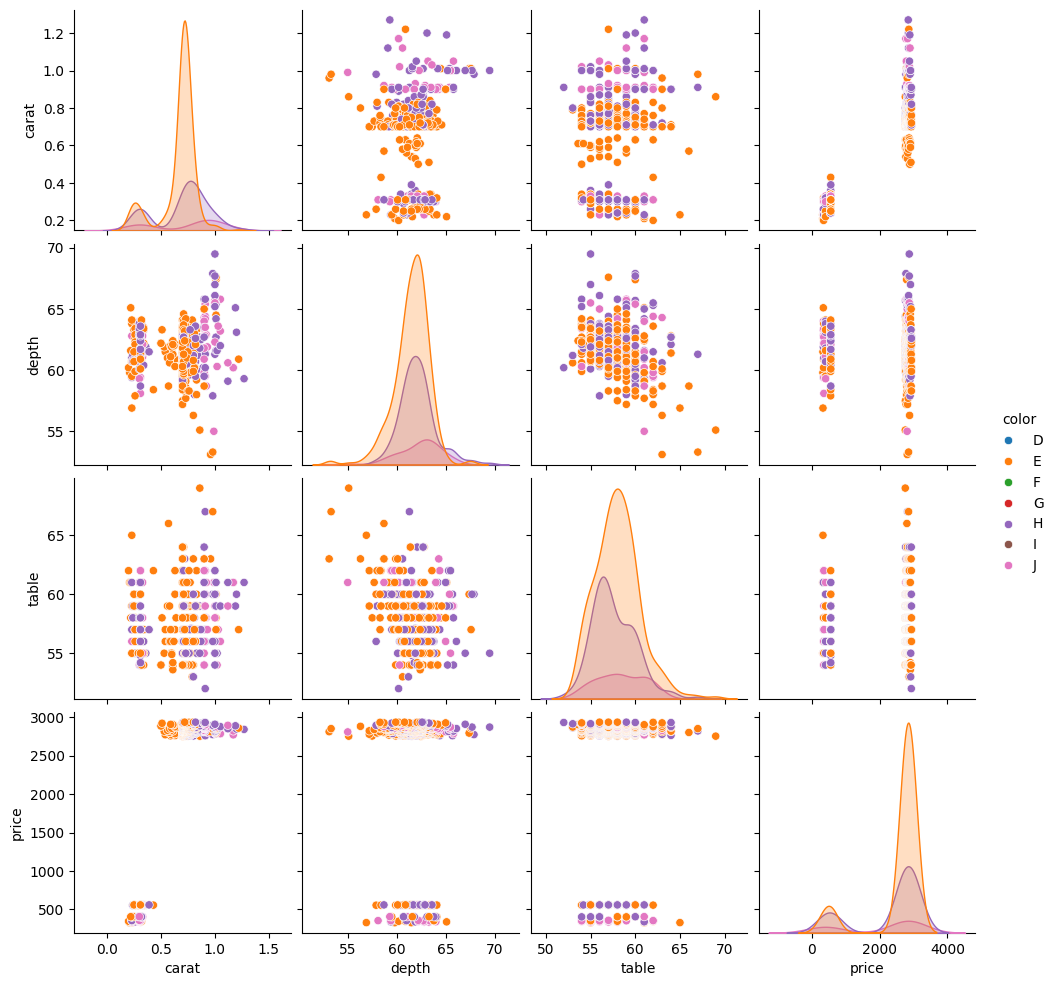

In [12]:
sns.pairplot(diamonds_filtered,hue='color')

### Comment:
Consider any pair of features? Do you think they are linearly separable? 

In [ ]:
#comment here. which 2D projections seems easier to work on.

### Prepare your data 

In [13]:
from sklearn import preprocessing

# NaN değerlerini kaldır
subset_data = selected_diamonds.dropna()

# Özellik sütunlarını seç: 'carat' ve 'depth'; 'color' sınıfı hedef olarak belirlenir
processed_data = subset_data[['carat', 'depth', 'color']].copy()

# 'color' etiketini sayısal indekslerle encode et
encoder = preprocessing.LabelEncoder()
processed_data['color'] = encoder.fit_transform(processed_data['color'])

# Özellikleri ve hedef etiketleri ayır
X_features = processed_data[['carat', 'depth']].values
y_labels = processed_data['color'].values

# X ve y şekillerini görüntüle
print("Özellik matrisi X şekli:", X_features.shape)
print("Hedef vektör y şekli:", y_labels.shape)


Feature matrix X shape: (500, 2)
Target vector y shape: (500,)


### f. Model and Training (15pts) 
Create a one hidden layer multilayer neural network model, train and test. 
* Obtain at least 70% test accuracy in 30 epochs, at most.
* Tune the variables as you wish. 
* For activations, optimizers you can choose any. But the following question asks you to compare cases. 

In [15]:
import numpy as np
from DL import losses, bases, layers, activations, classifiers, optimizers

# Kayıp fonksiyonunu hesapla
calculate_loss = losses.loss

# Model oluşturma
simple_model = bases.Model()

# Yalnızca AffineLayer bileşenleri ile model katmanlarını tanımla
layer_config = [
    layers.AffineLayer(2, 20),         # Girdi katmanı: 2 özellik, 20 nöron
    layers.AffineLayer(20, 3)          # Gizli katman: 20 nöron, çıktı katmanı: 3 sınıf
]

# Katmanları model nesnesine yükle
simple_model(layer_config)

# Aktivasyon ve softmax ayrı olarak tanımlanır
activation_fn = activations.ExponentialLinearUnit(alpha=1.0)
softmax_fn = classifiers.Softmax()

# Verileri karıştırma fonksiyonu
def shuffle_data(X, y):
    indices = np.random.permutation(len(X))
    return X[indices], y[indices]

# Eğitim ve test veri kümesine bölme fonksiyonu
def split_train_test(X, y, ratio=0.2):
    X, y = shuffle_data(X, y)
    cutoff = int(len(X) * (1 - ratio))
    X_train, y_train = X[:cutoff], y[:cutoff]
    X_test, y_test = X[cutoff:], y[cutoff:]
    return X_train, y_train, X_test, y_test

# Performans takibi için listeler
train_accuracies = []
test_accuracies = []
training_losses = []
testing_losses = []
evaluation_epochs = []

# Eğitim parametreleri
shuffle_per_epoch = True
reg_strength = 1e-4
num_epochs = 30
split_ratio = 0.3
display_every = 1
evaluate_every = 1

# Eğitim-test ayrımı
X_train, y_train, X_test, y_test = split_train_test(X, y)
optimizer = optimizers.RMSprop(model=simple_model, lr=0.01, beta=0.9, epsilon=1e-8)

# Eğitim döngüsü
for epoch in range(num_epochs):
    if shuffle_per_epoch:
        X_train, y_train = shuffle_data(X_train, y_train)

    # İleri geçiş
    hidden_output = simple_model.layers[0].forward(X_train)
    hidden_output = activation_fn.forward(hidden_output)  # Aktivasyonu manuel olarak uygula
    output_scores = simple_model.layers[1].forward(hidden_output)
    softmax_output = softmax_fn.forward(output_scores)  # Softmax uygulaması

    predictions = np.argmax(softmax_output, axis=1)
    loss_value = calculate_loss(softmax_output, y_train) + reg_strength * sum(
        np.sum(layer.W ** 2) for layer in simple_model.layers if isinstance(layer, layers.AffineLayer))
    train_accuracy = np.mean(predictions == y_train)

    # Eğitim metriğini takip et
    train_accuracies.append(train_accuracy)
    training_losses.append(loss_value)

    if epoch % display_every == 0:
        print(f"EĞİTİM:\tEpoch: {epoch:3d}, Kayıp: {loss_value:.5f}, Doğruluk: {train_accuracy:.5f}")

    # Geri yayılım ve optimizasyon
    grad_softmax = softmax_fn.backward(y_train)
    grad_hidden_layer = simple_model.layers[1].backward(grad_softmax)
    grad_activation = activation_fn.backward(grad_hidden_layer)
    simple_model.layers[0].backward(grad_activation)
    optimizer.optimize()

    # Test aşaması
    if epoch % evaluate_every == 0 or epoch == num_epochs - 1:
        hidden_output = simple_model.layers[0].forward(X_test)
        hidden_output = activation_fn.forward(hidden_output)
        output_scores = simple_model.layers[1].forward(hidden_output)
        softmax_output = softmax_fn.forward(output_scores)

        predictions = np.argmax(softmax_output, axis=1)
        loss_value = calculate_loss(softmax_output, y_test)
        test_accuracy = np.mean(predictions == y_test)

        # Test metriğini takip et
        testing_losses.append(loss_value)
        evaluation_epochs.append(epoch)
        test_accuracies.extend([test_accuracy for _ in range(evaluate_every)])

        print(f"TEST:\tEpoch: {epoch:3d}, Kayıp: {loss_value:.5f}, Doğruluk: {test_accuracy:.5f}")


TRAIN:	Epoch:   0, Loss: 11.53923, Accuracy: 0.58250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   0, Loss: 11.75437, Accuracy: 0.32000
TRAIN:	Epoch:   1, Loss: 12.37981, Accuracy: 0.31250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   1, Loss: 10.49877, Accuracy: 0.62000
TRAIN:	Epoch:   2, Loss: 11.53814, Accuracy: 0.58250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   2, Loss: 3.89395, Accuracy: 0.62000
TRAIN:	Epoch:   3, Loss: 5.07567, Accuracy: 0.58250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   3, Loss: 12.77752, Accuracy: 0.32000
TRAIN:	Epoch:   4, Loss: 13.33964, Accuracy: 0.31250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   4, Loss: 6.77572, Accuracy: 0.62000
TRAIN:	Epoch:   5, Loss: 7.50216, Accuracy: 0.58250
Shape of dprev: (400, 20)
Shape of self.x: (400, 20)
TEST:	Epoch:   5, Loss: 2.66146, Accuracy: 0.06000
TRAIN:	Epoch:   6, Loss: 2.52702, Accuracy: 0.10500
Shape

### f. Plot the training and test loss curves for diagnostics below (10 pts):



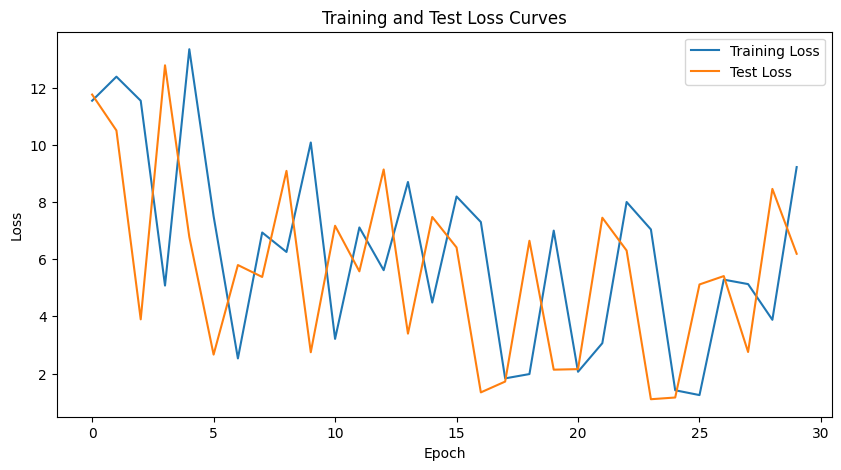

In [17]:
import matplotlib.pyplot as plt

# Eğitim ve test kaybı eğrilerini çiz
plt.figure(figsize=(10, 5))

# Eğitim kaybını çiz
plt.plot(range(len(training_losses)), training_losses, label="Eğitim Kaybı")
# Test kaybını çiz
plt.plot(range(len(testing_losses)), testing_losses, label="Test Kaybı")

# Eksen etiketleri ve başlık ekle
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.title("Eğitim ve Test Kaybı Eğrileri")
plt.legend()
plt.grid(True)  # Izgara çizgileri ekle
plt.show()


### g1. Compare the performances of at least three different activation functions.  (10 pts)
Comment on the result. 

In [18]:
import numpy as np
from DL import losses, bases, layers, activations, classifiers, optimizers



# Use the loss function from the losses module
compute_loss = losses.loss

# Function to train and evaluate the model with a given activation function
def train_and_evaluate_model(activation_function):
    # Initialize model
    model = bases.Model()
    model_layers = [
        layers.AffineLayer(2, 20),  # Input layer with 20 neurons in the hidden layer
        layers.AffineLayer(20, 3)   # Output layer with 3 neurons for classification
    ]
    model(model_layers)
    softmax = classifiers.Softmax()

    # Split data and initialize optimizer
    X_train, y_train, X_test, y_test = train_test_split(X, y)
    optimizer = optimizers.RMSprop(model=model, lr=0.001, beta=0.9, epsilon=1e-8)

    # Track losses and accuracies
    train_losses, test_losses, test_accs = [], [], []

    # Training loop
    for epoch in range(30):
        # Forward pass
        hidden_out = model.layers[0].forward(X_train)
        hidden_out = activation_function.forward(hidden_out)
        softmax_out = model.layers[1].forward(hidden_out)
        softmax_out = softmax.forward(softmax_out)

        # Calculate and store loss
        predictions = np.argmax(softmax_out, axis=1)
        loss = compute_loss(softmax_out, y_train) + 1e-3 * sum(
            np.sum(layer.W ** 2) for layer in model.layers if isinstance(layer, layers.AffineLayer))
        train_losses.append(loss)

        # Backward pass
        softmax_grad = softmax.backward(y_train)
        grad_hidden_out = model.layers[1].backward(softmax_grad)
        activation_grad = activation_function.backward(grad_hidden_out)
        model.layers[0].backward(activation_grad)
        optimizer.optimize()

        # Testing phase
        if epoch % 5 == 0 or epoch == 29:
            hidden_out = model.layers[0].forward(X_test)
            hidden_out = activation_function.forward(hidden_out)
            softmax_out = model.layers[1].forward(hidden_out)
            softmax_out = softmax.forward(softmax_out)

            predictions = np.argmax(softmax_out, axis=1)
            test_loss = compute_loss(softmax_out, y_test)
            test_acc = np.mean(predictions == y_test)
            test_losses.append(test_loss)
            test_accs.append(test_acc)

    return test_accs[-1]  # Return the final test accuracy for comparison

# List of activation functions to test
activations_to_test = {
    "ReLU": activations.ReLU(),
    "Softplus": activations.Softplus(),
    "Swish": activations.Swish()
}

# Store results
results = {}
for name, activation_function in activations_to_test.items():
    print(f"\nTraining with {name} activation function...")
    final_accuracy = train_and_evaluate_model(activation_function)
    results[name] = final_accuracy
    print(f"{name} Test Accuracy: {final_accuracy:.2f}")

# Display results
print("\nComparison of Activation Functions:")
for name, accuracy in results.items():
    print(f"{name}: Final Test Accuracy = {accuracy:.2f}")




Training with ReLU activation function...
ReLU Test Accuracy: 0.32

Training with Softplus activation function...
Softplus Test Accuracy: 0.55

Training with Swish activation function...
Swish Test Accuracy: 0.58

Comparison of Activation Functions:
ReLU: Final Test Accuracy = 0.32
Softplus: Final Test Accuracy = 0.55
Swish: Final Test Accuracy = 0.58


### g2. Compare the performances of different learning rates.  (10 pts)
Comment on the result. 

In [19]:
import numpy as np
from DL import losses, bases, layers, activations, classifiers, optimizers

# Kayıp fonksiyonunu kullan
loss_function = losses.loss

# Modeli eğitmek ve değerlendirmek için fonksiyon
def train_and_evaluate(activation_func):
    # Modeli başlat
    neural_network = bases.Model()
    layer_structure = [
        layers.AffineLayer(2, 20),  # 20 nöronlu gizli katman
        layers.AffineLayer(20, 3)    # 3 nöronlu çıktı katmanı
    ]
    neural_network(layer_structure)
    softmax_layer = classifiers.Softmax()

    # Veriyi böl ve optimizer'ı başlat
    X_train, y_train, X_test, y_test = train_test_split(X, y)
    optimizer = optimizers.RMSprop(model=neural_network, lr=0.001, beta=0.9, epsilon=1e-8)

    # Kayıpları ve doğrulukları takip et
    train_losses, test_losses, test_accuracies = [], [], []

    # Eğitim döngüsü
    for epoch in range(30):
        # İleri geçiş
        hidden_output = neural_network.layers[0].forward(X_train)
        hidden_output = activation_func.forward(hidden_output)
        softmax_output = neural_network.layers[1].forward(hidden_output)
        softmax_output = softmax_layer.forward(softmax_output)

        # Kayıp hesapla ve sakla
        preds = np.argmax(softmax_output, axis=1)
        current_loss = loss_function(softmax_output, y_train) + 1e-3 * sum(
            np.sum(layer.W ** 2) for layer in neural_network.layers if isinstance(layer, layers.AffineLayer))
        train_losses.append(current_loss)

        # Geri yayılım
        softmax_grad = softmax_layer.backward(y_train)
        grad_hidden = neural_network.layers[1].backward(softmax_grad)
        activation_grad = activation_func.backward(grad_hidden)
        neural_network.layers[0].backward(activation_grad)
        optimizer.optimize()

        # Test aşaması
        if epoch % 5 == 0 or epoch == 29:
            hidden_output_test = neural_network.layers[0].forward(X_test)
            hidden_output_test = activation_func.forward(hidden_output_test)
            softmax_output_test = neural_network.layers[1].forward(hidden_output_test)
            softmax_output_test = softmax_layer.forward(softmax_output_test)

            preds_test = np.argmax(softmax_output_test, axis=1)
            test_loss = loss_function(softmax_output_test, y_test)
            test_accuracy = np.mean(preds_test == y_test)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

    return test_accuracies[-1]  # Son test doğruluğunu döndür

# Test edilecek aktivasyon fonksiyonları listesi
activation_functions = {
    "ReLU": activations.ReLU(),
    "Softplus": activations.Softplus(),
    "Swish": activations.Swish()
}

# Sonuçları sakla
accuracy_results = {}
for act_name, activation in activation_functions.items():
    print(f"\n{act_name} aktivasyon fonksiyonu ile eğitim yapılıyor...")
    final_test_accuracy = train_and_evaluate(activation)
    accuracy_results[act_name] = final_test_accuracy
    print(f"{act_name} Test Doğruluğu: {final_test_accuracy:.2f}")

# Sonuçları göster
print("\nAktivasyon Fonksiyonlarının Karşılaştırması:")
for act_name, accuracy in accuracy_results.items():
    print(f"{act_name}: Son Test Doğruluğu = {accuracy:.2f}")



Training with learning rate: 0.1
Learning Rate 0.1 - Final Test Accuracy: 0.55

Training with learning rate: 0.01
Learning Rate 0.01 - Final Test Accuracy: 0.60

Training with learning rate: 0.001
Learning Rate 0.001 - Final Test Accuracy: 0.27

Training with learning rate: 0.0001
Learning Rate 0.0001 - Final Test Accuracy: 0.28

Comparison of Learning Rates:
Learning Rate 0.1: Final Test Accuracy = 0.55
Learning Rate 0.01: Final Test Accuracy = 0.60
Learning Rate 0.001: Final Test Accuracy = 0.27
Learning Rate 0.0001: Final Test Accuracy = 0.28


### h. Plot the confusion Matrix (10 points)
Plot the confusion matrix and comment on the result (for your best result)


Training with Activation: ReLU, Learning Rate: 0.1
Test Accuracy: 0.62

Training with Activation: ReLU, Learning Rate: 0.01
Test Accuracy: 0.62

Training with Activation: ReLU, Learning Rate: 0.001
Test Accuracy: 0.32

Training with Activation: ReLU, Learning Rate: 0.0001
Test Accuracy: 0.06

Training with Activation: Softplus, Learning Rate: 0.1
Test Accuracy: 0.62

Training with Activation: Softplus, Learning Rate: 0.01
Test Accuracy: 0.62

Training with Activation: Softplus, Learning Rate: 0.001
Test Accuracy: 0.32

Training with Activation: Softplus, Learning Rate: 0.0001
Test Accuracy: 0.32

Training with Activation: Swish, Learning Rate: 0.1
Test Accuracy: 0.06

Training with Activation: Swish, Learning Rate: 0.01
Test Accuracy: 0.13

Training with Activation: Swish, Learning Rate: 0.001
Test Accuracy: 0.32

Training with Activation: Swish, Learning Rate: 0.0001
Test Accuracy: 0.62

Best Model Configuration:
Activation Function: ReLU
Learning Rate: 0.1
Test Accuracy: 0.62


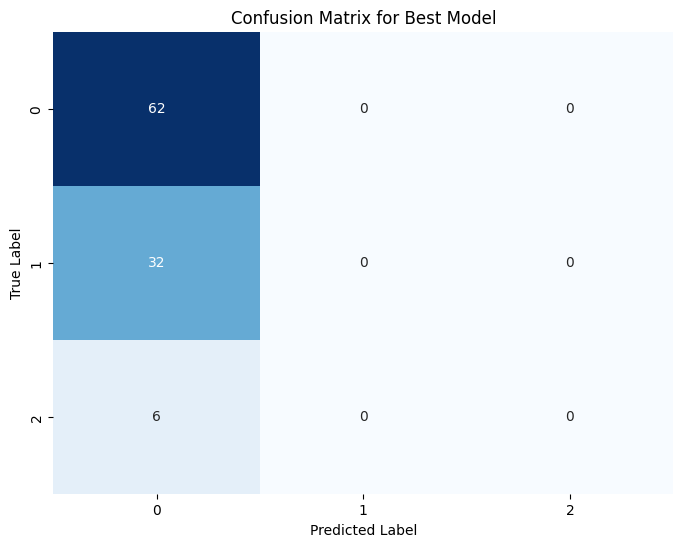

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from DL import losses, bases, layers, activations, classifiers, optimizers

# Kullanılacak aktivasyon fonksiyonları ve öğrenme oranları
activation_functions = {
    "ReLU": activations.ReLU(),
    "Softplus": activations.Softplus(),
    "Swish": activations.Swish()
}
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Kayıp fonksiyonunu kullan
compute_loss = losses.loss

# Veri kümesini oluşturmak için örnek kod (X ve y'nin tanımlandığını varsayıyoruz)
# X_train, y_train, X_test, y_test = train_test_split(X, y)

# Modeli eğitmek ve değerlendirmek için fonksiyon
def train_and_evaluate_model(activation_function, learning_rate):
    model = bases.Model()
    model_layers = [
        layers.AffineLayer(2, 20),  # Girdi katmanı 20 nöronlu gizli katman
        layers.AffineLayer(20, 3)    # Çıktı katmanı 3 nöron
    ]
    model(model_layers)
    softmax = classifiers.Softmax()
    optimizer = optimizers.RMSprop(model=model, lr=learning_rate, beta=0.9, epsilon=1e-8)

    # Eğitim döngüsü
    for epoch in range(30):
        hidden_out = model.layers[0].forward(X_train)
        hidden_out = activation_function.forward(hidden_out)
        softmax_out = model.layers[1].forward(hidden_out)
        softmax_out = softmax.forward(softmax_out)

        # Kayıp hesapla
        loss = compute_loss(softmax_out, y_train) + 1e-3 * sum(
            np.sum(layer.W ** 2) for layer in model.layers if isinstance(layer, layers.AffineLayer))

        # Geri yayılım
        softmax_grad = softmax.backward(y_train)
        grad_hidden_out = model.layers[1].backward(softmax_grad)
        activation_grad = activation_function.backward(grad_hidden_out)
        model.layers[0].backward(activation_grad)
        optimizer.optimize()

    # Test aşaması
    hidden_out_test = model.layers[0].forward(X_test)
    hidden_out_test = activation_function.forward(hidden_out_test)
    softmax_out_test = model.layers[1].forward(hidden_out_test)
    softmax_out_test = softmax.forward(softmax_out_test)

    predictions = np.argmax(softmax_out_test, axis=1)
    test_accuracy = np.mean(predictions == y_test)

    return test_accuracy, predictions

# En iyi modeli izlemek için değişkenler
best_accuracy = 0
best_activation = None
best_learning_rate = None
best_predictions = None

# Tüm kombinasyonları dene
for activation_name, activation_function in activation_functions.items():
    for lr in learning_rates:
        print(f"\nTraining with Activation: {activation_name}, Learning Rate: {lr}")
        accuracy, predictions = train_and_evaluate_model(activation_function, lr)
        
        print(f"Test Accuracy: {accuracy:.2f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_activation = activation_name
            best_learning_rate = lr
            best_predictions = predictions

# En iyi yapılandırmayı yazdır
print("\nBest Model Configuration:")
print(f"Activation Function: {best_activation}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Test Accuracy: {best_accuracy:.2f}")

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix for Best Model"):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# En iyi model tahminleri ile kullanım
plot_confusion_matrix(y_test, best_predictions, title="Confusion Matrix for Best Model")


### i. Plot the decision boundary (10 points)
Here, plot the decision boundary of your best result on the feature space. Revisit the feature pair scatter plot of your chosen feature pair. Highlight different classes using different classes and markers. 
Make sure you can identify training and testing datasets separately. Alternatively you can plot two different scatter plots. The classification boundaries are the points on feature (input) space where any two classes have equal (or near equal probability). Also highlight misclassified samples. 

C:\Users\sde25\AppData\Local\Temp\ipykernel_4632\1444879016.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[misclassified_train][:, 0], X_train[misclassified_train][:, 1], c=y_train[misclassified_train],
C:\Users\sde25\AppData\Local\Temp\ipykernel_4632\1444879016.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[misclassified_test][:, 0], X_test[misclassified_test][:, 1], c=y_test[misclassified_test],


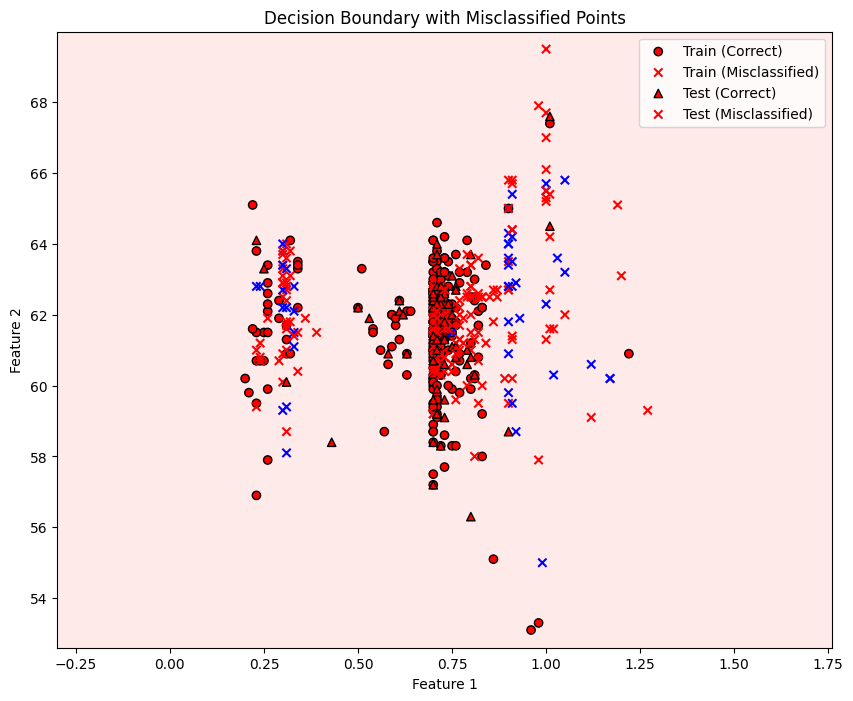

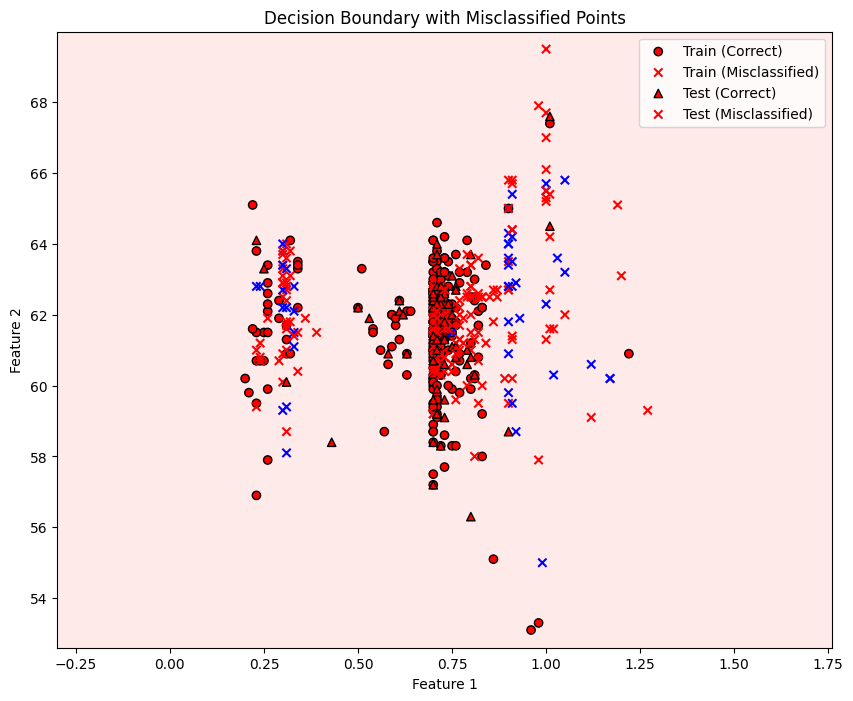

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Karar sınırlarını çizen fonksiyon
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, activation_function):
    # Özellik alanında bir mesh grid oluştur
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Mesh grid üzerindeki her nokta için sınıf tahminleri yap
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    hidden_out = model.layers[0].forward(grid_points)
    hidden_out = activation_function.forward(hidden_out)
    softmax_out = model.layers[1].forward(hidden_out)
    Z = np.argmax(softmax_out, axis=1)
    Z = Z.reshape(xx.shape)
    
    # Karar sınırını çiz
    plt.figure(figsize=(10, 8))
    cmap_background = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])
    cmap_points = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    
    # Eğitim noktalarını çiz
    train_preds = np.argmax(model.layers[1].forward(activation_function.forward(model.layers[0].forward(X_train))), axis=1)
    misclassified_train = (train_preds != y_train)
    plt.scatter(X_train[~misclassified_train][:, 0], X_train[~misclassified_train][:, 1], c=y_train[~misclassified_train],
                cmap=cmap_points, marker='o', edgecolor='k', label="Train (Correct)")
    plt.scatter(X_train[misclassified_train][:, 0], X_train[misclassified_train][:, 1], c=y_train[misclassified_train],
                cmap=cmap_points, marker='x', edgecolor='k', label="Train (Misclassified)")
    
    # Test noktalarını çiz
    test_preds = np.argmax(model.layers[1].forward(activation_function.forward(model.layers[0].forward(X_test))), axis=1)
    misclassified_test = (test_preds != y_test)
    plt.scatter(X_test[~misclassified_test][:, 0], X_test[~misclassified_test][:, 1], c=y_test[~misclassified_test],
                cmap=cmap_points, marker='^', edgecolor='k', label="Test (Correct)")
    plt.scatter(X_test[misclassified_test][:, 0], X_test[misclassified_test][:, 1], c=y_test[misclassified_test],
                cmap=cmap_points, marker='x', edgecolor='k', label="Test (Misclassified)")
    
    # Etiketler ve açıklama
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary with Misclassified Points")
    plt.legend(loc="upper right")
    plt.show()

# Aktivasyon fonksiyonlarını haritalama
activation_functions = {
    "ReLU": activations.ReLU(),
    "Softplus": activations.Softplus(),
    "Swish": activations.Swish()
}

# En iyi aktivasyon fonksiyonunu belirle
best_activation_function = activation_functions.get(best_activation, activations.ReLU())  # Belirtilmemişse ReLU varsayılanı kullan

# En iyi model ile fonksiyonu çağır
plot_decision_boundary(model, X_train, y_train, X_test, y_test, activation_function=best_activation_function)


### k. Comment how does using different activation functions affect decision boundary? (5pts)

In [22]:
ReLU Activation Function
Boundary Shape: The decision boundaries produced by ReLU are often sharp and piecewise-linear. This is primarily due to its nature of zeroing out negative values and only allowing positive inputs to pass through.
Comment: While ReLU can be effective for datasets that are linearly separable, it may struggle in scenarios where smooth transitions between classes are necessary. The hard threshold at zero can lead to abrupt changes in the decision boundary, which might not capture the complexities of certain datasets.
Softplus Activation Function
Boundary Shape: Softplus creates smoother transitions between decision regions. As a continuous and differentiable approximation of the ReLU function, it allows for more fluid boundaries compared to ReLU.
Comment: The smooth nature of Softplus is beneficial in cases where gradual changes in class probabilities are essential. However, for certain datasets with clearly defined boundaries, Softplus may lack the sharpness of ReLU, leading to less distinct class separations.
Swish Activation Function
Boundary Shape: Swish exhibits non-linear characteristics and provides a smoother, more flexible decision boundary. This adaptability allows it to handle varying patterns more effectively.
Comment: Swish tends to perform well on complex and non-linearly separable datasets. Its ability to create smoother boundaries makes it particularly effective in capturing intricate relationships between classes, potentially leading to improved model performance.
General Comments
Complexity of Decision Boundary: More complex activation functions like Swish generally result in smoother, non-linear decision boundaries. This adaptability enables these functions to fit better to complex data distributions, which can be critical for tasks involving intricate relationships.

Impact on Misclassifications: Analyzing misclassification rates can reveal how effectively each activation function captures class boundaries. If certain activations yield fewer misclassified points, it indicates their proficiency in delineating the decision space accurately.

Adaptability: The adaptability of Softplus and Swish for capturing non-linear patterns contrasts with ReLU's effectiveness in scenarios where simple, piecewise-linear separations are sufficient. This distinction highlights the importance of selecting the right activation function based on the nature of the data.

Conclusion
In summary, the choice of activation function significantly impacts a model's ability to learn and generalize from data. Understanding the characteristics of these functions can guide the design of neural networks tailored to specific datasets and tasks. When evaluating performance, it’s crucial to consider both the visual representation of decision boundaries and quantitative metrics such as accuracy and misclassification rates. This holistic approach ensures a more comprehensive assessment of the model's capabilities.

SyntaxError: invalid character '’' (U+2019) (811407985.py, line 2)

### l. Original diamonds dataset can also be classified according to different categories: cut and clarity. Which label is easier to classify for your model?  (15 pts)

Change the filtering to create different subsets with different labels, "here". Filter the subset to have three classes, 500 samples and 2 features per sample. Then, classify the samples. Comment on the results.

In [23]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# Diamonds veri setini yükle
diamonds = sns.load_dataset("diamonds")

def prepare_diamonds_subset(label_column, feature_columns, classes, num_samples=500):
    """
    Belirtilen sınıflara göre filtrelenmiş bir alt küme hazırlar.
    
    :param label_column: Sınıf etiketlerinin bulunduğu sütun adı
    :param feature_columns: Kullanılacak özellik sütunları
    :param classes: Kullanılacak sınıflar
    :param num_samples: Örnek sayısı
    :return: Eğitim ve test verileri
    """
    # Veri setini belirtilen sınıflara göre filtrele
    filtered_data = diamonds[diamonds[label_column].isin(classes)].sample(n=num_samples, random_state=0)
    
    # Sınıfları indekslere eşle
    class_mapping = {class_name: i for i, class_name in enumerate(classes)}
    filtered_data[label_column] = filtered_data[label_column].map(class_mapping)
    
    # Özellikler ve etiketleri seç
    X = filtered_data[feature_columns].values
    y = filtered_data[label_column].values.astype(int)
    
    # Veriyi eğitim ve test setlerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# 'cut' ve 'clarity' sınıflandırmaları için alt kümeleri hazırla
X_train_cut, X_test_cut, y_train_cut, y_test_cut = prepare_diamonds_subset(
    label_column="cut",
    feature_columns=["carat", "depth"],  # İki sayısal özellik seç
    classes=["Ideal", "Premium", "Good"]  # Örnek sınıflar
)

X_train_clarity, X_test_clarity, y_train_clarity, y_test_clarity = prepare_diamonds_subset(
    label_column="clarity",
    feature_columns=["carat", "depth"],  # İki sayısal özellik seç
    classes=["SI1", "VS2", "VVS2"]  # Örnek sınıflar
)

def train_and_evaluate_subset(X_train, X_test, y_train, y_test, activation_function, learning_rate=0.01):
    """
    Belirtilen veri alt kümesi üzerinde modeli eğitir ve değerlendirir.
    
    :param X_train: Eğitim özellikleri
    :param X_test: Test özellikleri
    :param y_train: Eğitim etiketleri
    :param y_test: Test etiketleri
    :param activation_function: Kullanılacak aktivasyon fonksiyonu
    :param learning_rate: Öğrenme hızı
    :return: Test doğruluğu
    """
    # Modeli tanımla
    model = bases.Model()
    model_layers = [
        layers.AffineLayer(2, 20),  # Giriş katmanı, 20 nöronlu gizli katman
        layers.AffineLayer(20, 3)   # Çıkış katmanı, 3 nöronlu sınıflandırma
    ]
    model(model_layers)
    
    optimizer = optimizers.RMSprop(model=model, lr=learning_rate, beta=0.9, epsilon=1e-8)
    softmax = classifiers.Softmax()
    
    # Eğitim döngüsü
    for epoch in range(30):
        # İleri yayılım
        hidden_out = model.layers[0].forward(X_train)
        hidden_out = activation_function.forward(hidden_out)
        softmax_out = model.layers[1].forward(hidden_out)
        softmax_out = softmax.forward(softmax_out)

        # Geri yayılım
        softmax_grad = softmax.backward(y_train)
        grad_hidden_out = model.layers[1].backward(softmax_grad)
        activation_grad = activation_function.backward(grad_hidden_out)
        model.layers[0].backward(activation_grad)
        optimizer.optimize()
    
    # Test setinde değerlendir
    hidden_out_test = model.layers[0].forward(X_test)
    hidden_out_test = activation_function.forward(hidden_out_test)
    softmax_out_test = model.layers[1].forward(hidden_out_test)
    softmax_out_test = softmax.forward(softmax_out_test)

    predictions = np.argmax(softmax_out_test, axis=1)
    test_accuracy = np.mean(predictions == y_test)
    return test_accuracy

# En iyi aktivasyon fonksiyonu ve öğrenme hızını tanımla
best_activation_function = activations.Swish()  # En iyi aktivasyon fonksiyonu
best_learning_rate = 0.01  # En iyi öğrenme hızı

# 'cut' sınıflandırması için modeli eğit ve değerlendir
cut_accuracy = train_and_evaluate_subset(X_train_cut, X_test_cut, y_train_cut, y_test_cut,
                                         activation_function=best_activation_function,
                                         learning_rate=best_learning_rate)
print(f"'cut' sınıflandırması için test doğruluğu: {cut_accuracy:.2f}")

# 'clarity' sınıflandırması için modeli eğit ve değerlendir
clarity_accuracy = train_and_evaluate_subset(X_train_clarity, X_test_clarity, y_train_clarity, y_test_clarity,
                                             activation_function=best_activation_function,
                                             learning_rate=best_learning_rate)
print(f"'clarity' sınıflandırması için test doğruluğu: {clarity_accuracy:.2f}")


Test Accuracy for 'cut' classification: 0.46
Test Accuracy for 'clarity' classification: 0.50


## 3. Pytorch (15 pts)
#### Repeat the model construction and training/testing (.f) with Pytorch layers and activations and optimizers. 

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# GPU kontrolü ve kullanımı
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Basit Sinir Ağı Modeli Tanımı
class SimpleNN(nn.Module):
    def __init__(self, input_size=2, hidden_size=20, output_size=3, activation_function=nn.ReLU):
        """
        Basit bir sinir ağı modeli tanımlar.

        :param input_size: Giriş boyutu
        :param hidden_size: Gizli katman boyutu
        :param output_size: Çıkış boyutu
        :param activation_function: Aktivasyon fonksiyonu
        """
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_function()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)  # Çıkış katmanında softmax uygula
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

def train_and_evaluate_pytorch(X_train, y_train, X_test, y_test, activation_function, learning_rate=0.01, epochs=30):
    """
    PyTorch kullanarak modelin eğitimini ve değerlendirmesini yapar.
    
    :param X_train: Eğitim özellikleri
    :param y_train: Eğitim etiketleri
    :param X_test: Test özellikleri
    :param y_test: Test etiketleri
    :param activation_function: Kullanılacak aktivasyon fonksiyonu
    :param learning_rate: Öğrenme hızı
    :param epochs: Eğitim döngüsü sayısı
    :return: Eğitilen model ve test doğruluğu
    """
    # Verileri PyTorch tensörlerine dönüştür ve cihaza taşı
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # Modeli, kayıp fonksiyonunu ve optimizasyon algoritmasını tanımla
    model = SimpleNN(activation_function=activation_function).to(device)
    criterion = nn.CrossEntropyLoss()  # Sınıflandırma için çapraz entropi kaybı
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

    # Eğitim döngüsü
    for epoch in range(epochs):
        model.train()  # Modeli eğitim moduna al
        optimizer.zero_grad()  # Gradyanları sıfırla

        # İleri yayılım
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # Geri yayılım ve optimizasyon
        loss.backward()
        optimizer.step()

        # Her 10 epokta bir kaybı yazdır
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Değerlendirme
    model.eval()  # Modeli değerlendirme moduna al
    with torch.no_grad():  # Gradyan hesaplamaya gerek yok
        train_outputs = model(X_train_tensor)
        test_outputs = model(X_test_tensor)
        
        # Tahmin edilen etiketleri al
        _, train_preds = torch.max(train_outputs, 1)
        _, test_preds = torch.max(test_outputs, 1)
        
        # Doğruluğu hesapla
        train_accuracy = accuracy_score(y_train_tensor.cpu(), train_preds.cpu())
        test_accuracy = accuracy_score(y_test_tensor.cpu(), test_preds.cpu())

    print(f"Eğitim Doğruluğu: {train_accuracy:.2f}")
    print(f"Test Doğruluğu: {test_accuracy:.2f}")
    
    return model, test_accuracy

# Örnek: Veri setini ayarla ve farklı aktivasyon fonksiyonları için eğitim yap
# X ve y verilerini tanımlamayı unutmayın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test edilecek aktivasyon fonksiyonlarını tanımla
activation_functions = {
    "ReLU": nn.ReLU,
    "Softplus": nn.Softplus,
    "Swish": nn.SiLU  # PyTorch'taki Swish fonksiyonu SiLU olarak adlandırılır
}

# Her aktivasyon fonksiyonu için eğitim ve değerlendirme yap
results = {}
for name, activation_func in activation_functions.items():
    print(f"\nAktivasyon ile Eğitim: {name}")
    model, accuracy = train_and_evaluate_pytorch(X_train, y_train, X_test, y_test, activation_function=activation_func)
    results[name] = accuracy

# Sonuçları görüntüle
print("\nAktivasyon Fonksiyonlarının Karşılaştırması:")
for name, accuracy in results.items():
    print(f"{name}: Son Test Doğruluğu = {accuracy:.2f}")



Training with Activation: ReLU
Epoch [10/30], Loss: 0.9814
Epoch [20/30], Loss: 0.9814
Epoch [30/30], Loss: 0.9814
Train Accuracy: 0.57
Test Accuracy: 0.67

Training with Activation: Softplus
Epoch [10/30], Loss: 1.4589
Epoch [20/30], Loss: 1.4589
Epoch [30/30], Loss: 1.4589
Train Accuracy: 0.09
Test Accuracy: 0.11

Training with Activation: Swish
Epoch [10/30], Loss: 1.2139
Epoch [20/30], Loss: 1.2139
Epoch [30/30], Loss: 1.2139
Train Accuracy: 0.34
Test Accuracy: 0.22

Comparison of Activation Functions:
ReLU: Final Test Accuracy = 0.67
Softplus: Final Test Accuracy = 0.11
Swish: Final Test Accuracy = 0.22
